In [1]:
import torch 
import numpy as np 
import os
import re 
import random 

from torch.utils.data import Dataset 

In [2]:
filename = '../data/maptask/splits/train.txt'
dialog_files = os.listdir('../data/maptask/parsed_transcripts')

In [3]:
FILEDIR = '../data/maptask/transcripts'

In [4]:
# Parsing transcript 
for file in os.listdir(FILEDIR)[:1]:
    print("CONVO")
    speaker = "" 
    output  = ""
    with open(os.path.join(FILEDIR, file)) as stream:
        lines = stream.readlines()[4:]
        for line in lines:
            output += line
        print(output)


CONVO
f	uh-huh 	
g	right 	
g	go along to your left in a straight line about an inch on the map 	
f	what am i trying to avoid first of all 	
g	stony desert 	
f	that's below the start 	
g	uh-huh 	
f	so i just go s-- left 	
g	go along left 	
f	how far 	
g	about centimetre and a half 	
f	aye 	
g	you past it 	
f	oh right okay right okay 	
g	you past stony desert 	
f	yeah 	
g	right now go down to bottom left t-- 	
f	diagonally 	
g	yes 	
g	to miss the to get below the plane crash 	
f	the plane crash at the top right 	
g	right 	
f	where does your route end 	
g	sort of middle above middle right 	
f	what's down there 	
g	oh there's another plane crash down here though 	
f	no there's only one 	
g	right we'll just do that anyway right go down diagonally to the bottom left of the page 	
f	right 	
g	not right to the bottom 	
f	right okay 	
g	and then up in a straight line about 	
f	right 	
g	er about two and a half centimetres 	
f	is there a collaps-- 	
f	is there a collapsed shelter 	
g	collapsed s

In [5]:
# Parsing transcript 
for file in os.listdir(FILEDIR)[:1]:
    print("CONVO")
    speaker = "" 
    output  = ""
    with open(os.path.join(FILEDIR, file)) as stream:
        lines = stream.readlines()[4:]
        for line in lines:
            line = line.replace("\n", "")
            new_speaker = line[0]

            if new_speaker == speaker or speaker == "":
                output += line[2:]
                if speaker == "":
                    speaker = new_speaker
            else:
                output += "\n"
                output += line[2:]
                speaker = new_speaker
        output = re.sub('[^\S\r\n]+', ' ', output)
        print(output)


CONVO
uh-huh 
right go along to your left in a straight line about an inch on the map 
what am i trying to avoid first of all 
stony desert 
that's below the start 
uh-huh 
so i just go s-- left 
go along left 
how far 
about centimetre and a half 
aye 
you past it 
oh right okay right okay 
you past stony desert 
yeah 
right now go down to bottom left t-- 
diagonally 
yes to miss the to get below the plane crash 
the plane crash at the top right 
right 
where does your route end 
sort of middle above middle right 
what's down there 
oh there's another plane crash down here though 
no there's only one 
right we'll just do that anyway right go down diagonally to the bottom left of the page 
right 
not right to the bottom 
right okay 
and then up in a straight line about 
right 
er about two and a half centimetres 
is there a collaps-- is there a collapsed shelter 
collapsed shelter go up round above that 
uh-huh right so i start swinging to the right again 
well once you've gone up 'til

In [6]:
dialog = []
labels = []
with open(filename, "r") as indexes:
    for index in indexes:
        dialog_file = os.path.join('../data/maptask/parsed_transcripts', dialog_files[int(index)])
        
        with open(dialog_file, "r") as d:
            for line in d.readlines():
                    dialog.append(line.strip())
                    labels.append(1)

In [7]:
def weighted_random(choices, first=1, last=1):
    choices = [0] * first + [x for x in range(1, len(choices) - 2)] + [len(choices) - 1] * last 
    print(choices)
    return random.choice(choices)

In [8]:
def add_non_trp(ipu):
    words =  ipu.split(" ")
    start_index = weighted_random(range(0,len(words) - 2), first=10)
    length = weighted_random(range(1, len(words) - start_index), first=0, last=10)
    return " ".join(words[start_index: start_index+length])

In [9]:
copy_dialog = dialog[0]
print(copy_dialog)
for i in range(10):
    print(add_non_trp(copy_dialog))

right er the start is at a diamond mine
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
er the start is at a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
right er the start is at a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
right
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
right er the start
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
right er
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
right er the start is at a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
right er the start is at a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
right er the start is at a
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 6]
[1, 2, 3, 4, 5, 7,

## Visualize MapTaskDataset

In [36]:
import sys
import data
import bespoketart

import seaborn as sns
from transformers import BertTokenizer

In [11]:
ds = data.maptask.MapTaskDataset()

<Axes: ylabel='Count'>

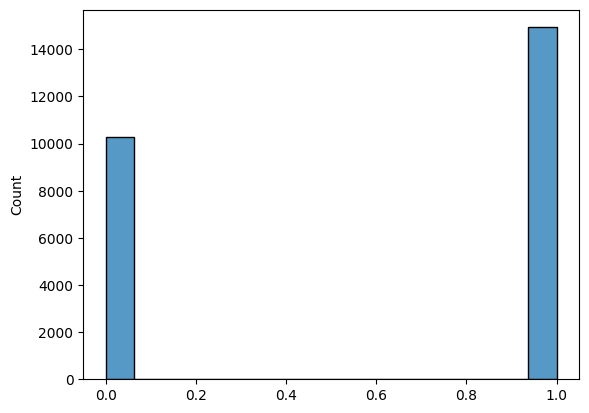

In [12]:
sns.histplot(ds.labels)

<Axes: ylabel='Count'>

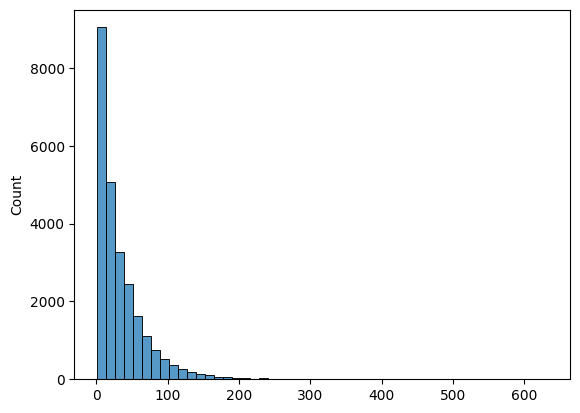

In [13]:
sns.histplot([len(x) for x in ds.dialogs], bins=50)

In [34]:
ds.tokens['input_ids'][3][:24]

tensor([  101,  2085,  2057,  1005,  2128,  2079,  2023,  1996,  2168,  2126,
         2004,  2057,  2106,  2009,  2077,  2045,  1005,  1055,  1037, 16776,
         2158,  3788,  2247,   102])

In [43]:
ds.dialogs[6], len(ds.dialogs[4].split(" "))

("so as we can er it'll be fae the perspective of the viewer right is is the guy walking along",
 16)

In [37]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [46]:
tokenizer.decode(ds.tokens['input_ids'][6])[:250]

"[CLS] so as we can er it'll be fae the perspective of the viewer right is is the guy walking along [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] ["

In [48]:
ds.tokens['token_type_ids'][6]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,